# Part I - (Portuguese Dataset Exploration)
## by (Wilfred Njeunwi Tagha)

## Introduction

>**Introduce the dataset**:

>This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. This analysis focuses only on the Portuguese language dataset. Here's the link to the data https://www.kaggle.com/datasets/whenamancodes/student-performance

>**Columns	Description**

>**school**	student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

>**sex**	student's sex (binary: 'F' - female or 'M' - male)

>**age**	student's age (numeric: from 15 to 22)

>**address**	student's home address type (binary: 'U' - urban or 'R' - rural)

>**famsize**	family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

>**Pstatus**	parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

>**Medu**	mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

>**Fedu**	father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

>**Mjob**	mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

>**Fjob**	father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

>**reason**	reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

>**guardian**	student's guardian (nominal: 'mother', 'father' or 'other')

>**traveltime**	home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

>**studytime**	weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

>**failures**	number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup	extra educational support (binary: yes or no)

>**famsup**	family educational support (binary: yes or no)

>**paid**	extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

>**activities**	extra-curricular activities (binary: yes or no)

>**nursery**	attended nursery school (binary: yes or no)

>**higher**	wants to take higher education (binary: yes or no)

>**internet**	Internet access at home (binary: yes or no)

>**romantic**	with a romantic relationship (binary: yes or no)

>**famrel**	quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

>**freetime**	free time after school (numeric: from 1 - very low to 5 - very high)

>**goout**	going out with friends (numeric: from 1 - very low to 5 - very high)

>**Dalc**	workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

>**Walc**	weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

>**health**	current health status (numeric: from 1 - very bad to 5 - very good)

>**absences**	number of school absences (numeric: from 0 to 93)

>**Grade	Description**

>**G1**	first period grade (numeric: from 0 to 20)

>**G2**	second period grade (numeric: from 0 to 20)

>**G3**	final grade (numeric: from 0 to 20, output target)



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading Data Set


In [2]:
portuguese_df = pd.read_csv("Portuguese.csv")
print(portuguese_df.shape)
print(portuguese_df.dtypes)
print(portuguese_df.head(10))

(649, 33)
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     

In [3]:
portuguese_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

> Most of the columns that I'll be using for analysis are ordinal but they appear as integers as seen above. So I'll rename the categories properly i.e. According to thier description.

In [4]:
#Category orders for different columns
good_order = ["very bad", "bad", "moderate", "good", "very good"]
high_order = ["very low", "low", "moderate", "high", "very high"]
quality_order = ["very bad", "fair", "good", "very good", "Excellent"]
study_time_order = ["<2 hours", "2 to 5 hours", "5 ot 10 hours", "> 10 hours"]

> Function for renaming categories

In [5]:
#Here is a function to change categories from numbers to thier proper names.
def rename_categories(column, order):
    """ gets the column of a dataframe and change it to a more descriptive ordered category given that it has orderd numeric values"""
    new = []
    for number in portuguese_df[column]:
        new.append(order[int(number)-1])
    portuguese_df[column]= new
    portuguese_df[column]=portuguese_df[column].astype(pd.api.types.CategoricalDtype(ordered = True,
                                                categories = order))


>Using the function to rename the following columns; Walc, freetime, goout, Dalc, famrel and studytime

In [6]:
rename_categories("Walc", high_order)
rename_categories("freetime", high_order)
rename_categories("goout", high_order)
rename_categories("Dalc", high_order)
rename_categories("famrel", quality_order)
rename_categories("studytime", study_time_order)



### What is the structure of your dataset?

>  This dataset has 649 records and 33 features. Most of the variables are categorical. About five columns are numerical such as absences, grades(G1, G2 and G3) and age. The categories and ordered varialbe are clealy explained above in the introduction to the dataset.


### What is/are the main feature(s) of interest in your dataset?

> I'm interested in the students activities that can be used for predicting the grade of the student and the environment that can be used for predicting the activities of the student.

> The activities of interest are absences, outing(goout), Dringking(Dalc and Walc) and studytime while the environment of interest are family relations, Age, Sex and freetime.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that The student's grade should be greately affected positively by the study time and negatively by weekday alcoholic consumtion while the study time and alcoholic consumtion will be greately affected by the family relationship 

## Univariate Exploration

> I'll begin by looking at the gender distribution of the students. Is it uniform? or they are more males than females?

Text(0.5, 1.0, 'Gender Distribution')

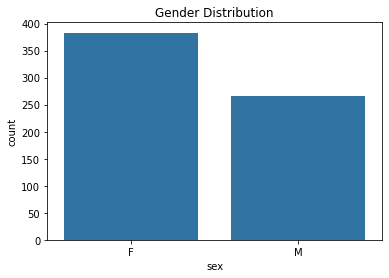

In [8]:
base_color = sb.color_palette()[0]
sb.countplot(data = portuguese_df, x = 'sex', color = base_color)
plt.title("Gender Distribution")


> The graph above clearly shows that they are more female students than male students.

> What is the age range of the students?

Text(0.5, 1.0, 'Age Distribution')

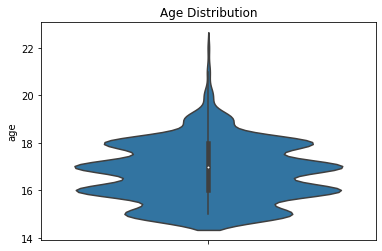

In [9]:
sb.violinplot(data = portuguese_df, y = 'age',
               color = base_color)
plt.title("Age Distribution")

> From the plot above. Most students are between 16 and 18 years. The least student is above 14 and the highest is 22.

> Do students have enough time for studies?
> Are thier family relations strong?,
> Are they involved in much drinking and outing?
> Are they having few freetime?

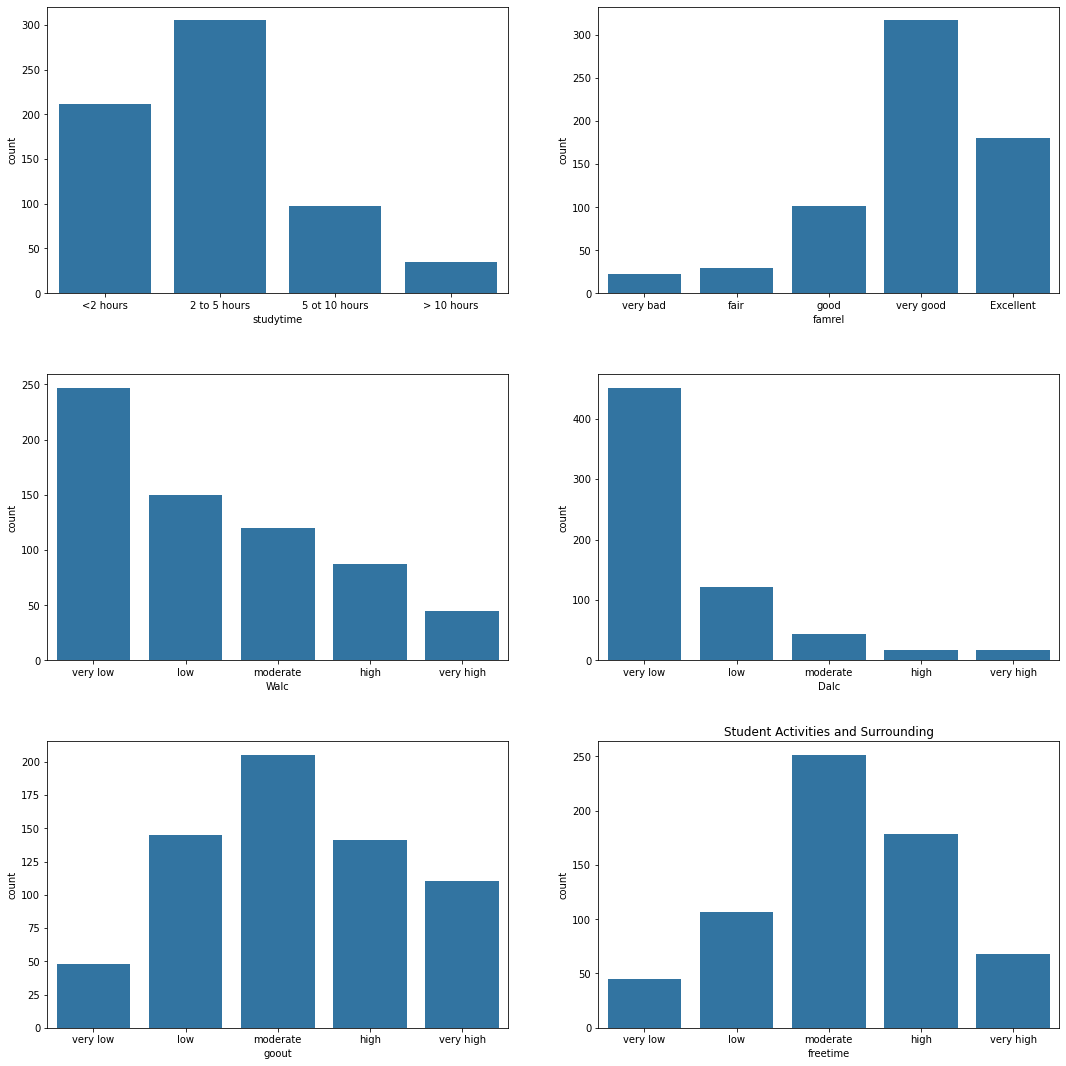

In [10]:

fig, ax = plt.subplots(nrows=3, ncols=2, figsize = [16,16])

default_color = sb.color_palette()[0]
sb.countplot(data = portuguese_df, x = 'studytime', color = base_color, ax = ax[0][0])
sb.countplot(data = portuguese_df, x = 'famrel', color = base_color, ax = ax[0][1])
sb.countplot(data = portuguese_df, x = 'Walc', color = base_color, ax = ax[1][0])
sb.countplot(data = portuguese_df, x = 'Dalc', color = base_color, ax = ax[1][1])
sb.countplot(data = portuguese_df, x = 'goout', color = base_color, ax = ax[2][0])
sb.countplot(data = portuguese_df, x = 'freetime', color = base_color, ax = ax[2][1])
fig.tight_layout(pad=5.0)
plt.title("Student Activities and Surrounding")
plt.show()

> From the plot above:

>Most students study for 2 to 5 hours daily while a larger fraction of the rest study for less than 2 hours. Quite interesting to see that some study for more than 10 hours.

>Students show to have very good family relations. Just a few are fair and very bad while a good fraction have excellent family relations.

>As the level of alcoholic conusmtion(what I cal drinking habbit) increases, the number of students involves reduces. More students are associated with low drinking habbits both for week days and for school days. 

>The outing habbits of students are niether very high nor very low. Most of them are between high, low and moderate.

> Lastly very few students have very low free time. Most of them have moderate and high free time and a couple of them with very high freetime.

> What is the distribution of absences like? is it normal or skewed?

Text(0.5, 1.0, 'Absence Distribution')

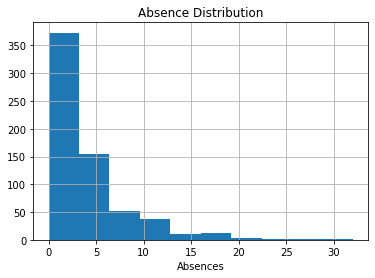

In [11]:
portuguese_df.absences.hist()
plt.xlabel("Absences")
plt.title("Absence Distribution")

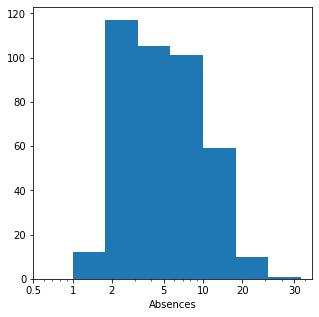

In [12]:
log_binsize = .25
bins = 10 ** np.arange(0, np.log10(portuguese_df['absences'].max())+log_binsize, log_binsize)

plt.figure(figsize=[5, 5])
plt.hist(data = portuguese_df, x = 'absences', bins = bins)
plt.xscale('log')
plt.xticks([.5, 1, 2, 5, 10, 20, 50], [.5, '1', '2', '5', '10', '20','30'])
plt.xlabel('Absences')
plt.show()

> The number of absences is highly skewed to the right. Performing a log transformation makes it clearer that most students have between two and 10 absences.

> How do students perform?

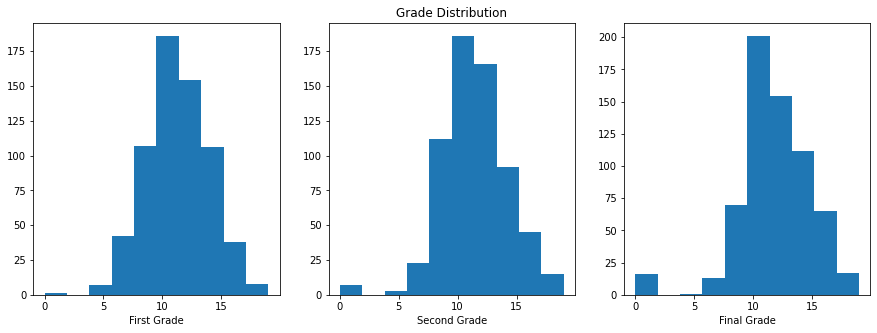

In [13]:
fig, ax = plt.subplots( ncols=3, figsize = [15,5])

ax[0].hist(data = portuguese_df, x = 'G1')
ax[1].hist(data = portuguese_df, x = 'G2')
ax[2].hist(data = portuguese_df, x = 'G3')
ax[0].set_xlabel("First Grade")
ax[1].set_xlabel("Second Grade")
ax[2].set_xlabel("Final Grade")
ax[1].set_title("Grade Distribution")



plt.show()



> The distribution of grades are similar. Having a normal distribution with the modal point around 10.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I performed a log transformation on the number of absences variable. It was right skewed and after the transformation it looked more normal.


## Bivariate Exploration



> I'll begin my bivariate exploration by seeing the correlation between all the three grades

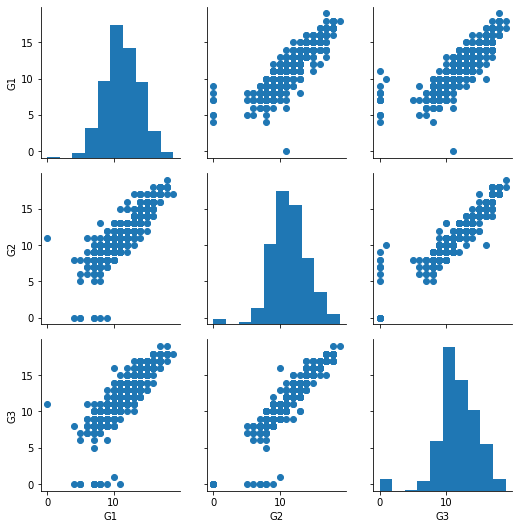

In [14]:

g_map = sb.PairGrid(data = portuguese_df, vars =['G1', 'G2', 'G3'] )
g_map = g_map.map_diag(plt.hist);
g_map.map_offdiag(plt.scatter)

> There is a strong positive correlation between G1, G2 and G3

> How does absences affect the grades of students?

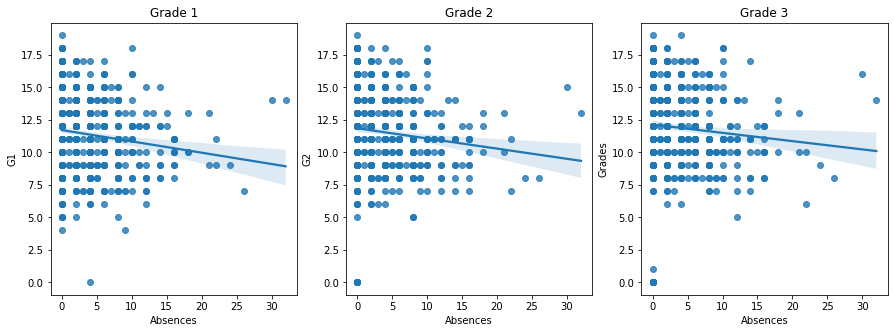

In [15]:
fig, ax = plt.subplots( ncols=3, figsize = [15,5])


sb.regplot(data = portuguese_df, x = 'absences', y = 'G1', ax=ax[0]);
ax[0].set_xlabel('Absences')
ax[0].set_title("Grade 1")

sb.regplot(data = portuguese_df, x = 'absences', y = 'G2', ax=ax[1]);
ax[1].set_xlabel('Absences')
ax[1].set_title("Grade 2")

sb.regplot(data = portuguese_df, x = 'absences', y = 'G3', ax=ax[2]);
ax[2].set_xlabel('Absences')
ax[2].set_ylabel('Grades')
ax[2].set_title("Grade 3")

plt.show()

> There is a  negative correlation between The grades and absences. 

> How do students with more drinking habit perform?

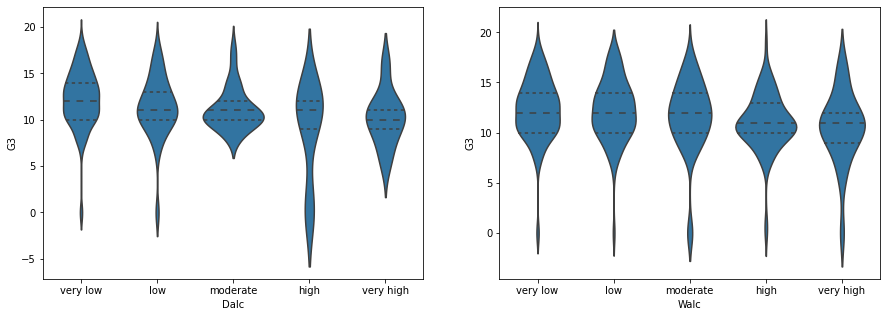

In [16]:
fig, ax = plt.subplots( ncols=2, figsize = [15,5])
sb.violinplot(data=portuguese_df, x='Dalc', y='G3', color=base_color, ax = ax[0], inner='quartile')
sb.violinplot(data=portuguese_df, x='Walc', y='G3', color=base_color, ax = ax[1], inner='quartile');

> A keen look shows that students with lower alcoholic consumption perform relatively more than those whith higher alcoholic consumption.

> How do students with more free time perfome?

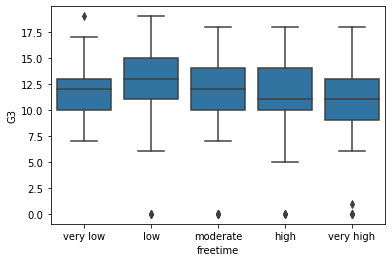

In [17]:
sb.boxplot(data=portuguese_df, x='freetime', y='G3', color=base_color);

> Students with just low freetime tend to perform more than any other while students with very high freetime tend to perform least.

> How often do people with high grades go out?

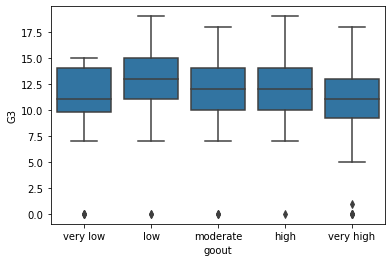

In [18]:
sb.boxplot(data=portuguese_df, x='goout', y='G3', color=base_color);

> students with high grades do not neccessarily have very low outing habbits. Thier outing habit is just low.

> How does study time affect the performance?

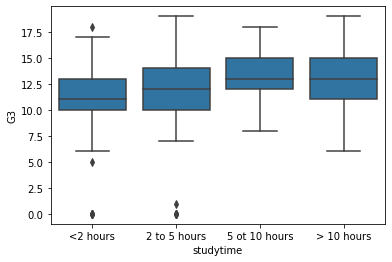

In [19]:
sb.boxplot(data=portuguese_df, x='studytime', y='G3', color=base_color);

> It is clear from the plot that people with more study time tend to perform better than people with lesser study time. It seems however that study hours greater than 10 hours have no much effect.

> Which sex perform better

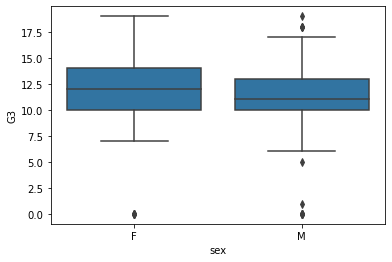

In [20]:
sb.boxplot(data=portuguese_df, x='sex', y='G3', color=base_color);

>From the plot above, it appears that females perform  better than males on average

> What is the effect of family relations on Outing, Drinking and Study time?

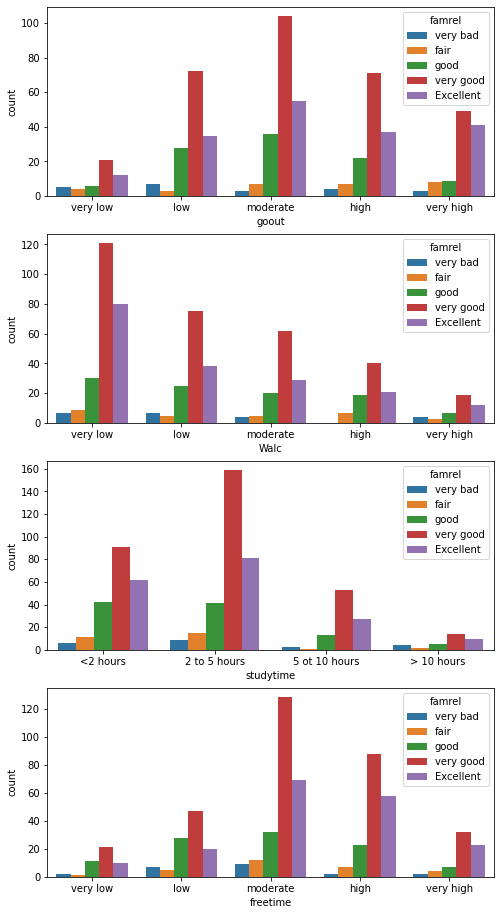

In [21]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 16])
X = ['goout', 'Walc', 'studytime', 'freetime']

for i in range(len(X)):
    ax = plt.subplot(4, 1, i+1)
    sb.countplot(data = portuguese_df, x = X[i], hue = 'famrel')

plt.show()



### How did the feature(s) of interest varied with other features in the dataset?

> All the three grades strongly corellate positively with one another

> Absences correlate negatively with grades. However the regression line isn't that steep.

> Higher Drinking habbits associates with lesser performance(grades)

> More studytime associates with higher grades

> freetime and going out have similar effects on grades; when too much, the performance is poor but when it is least the performance is still low. However students with higher grades tend to have some time(more than the least) for flexing(outing and freetime)

> Females perform More than Males



## Multivariate Exploration



> can the age increase the strenght of the relationship between study time and grade?


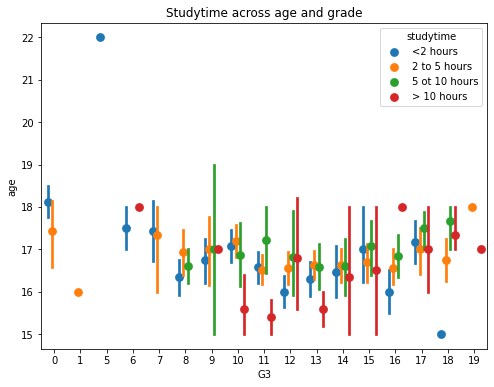

In [22]:
fig = plt.figure(figsize = [8,6])

ax = sb.pointplot(data = portuguese_df, x = 'G3', y = 'age', hue = 'studytime',
            linestyles = '', dodge = 0.5)
plt.title('Studytime across age and grade')
plt.ylabel('age')
ax.set_yticklabels([],minor = True)
plt.show();

> Age doesn't seem to strengthen this relationship

> What is the relationship between grade absences and age?

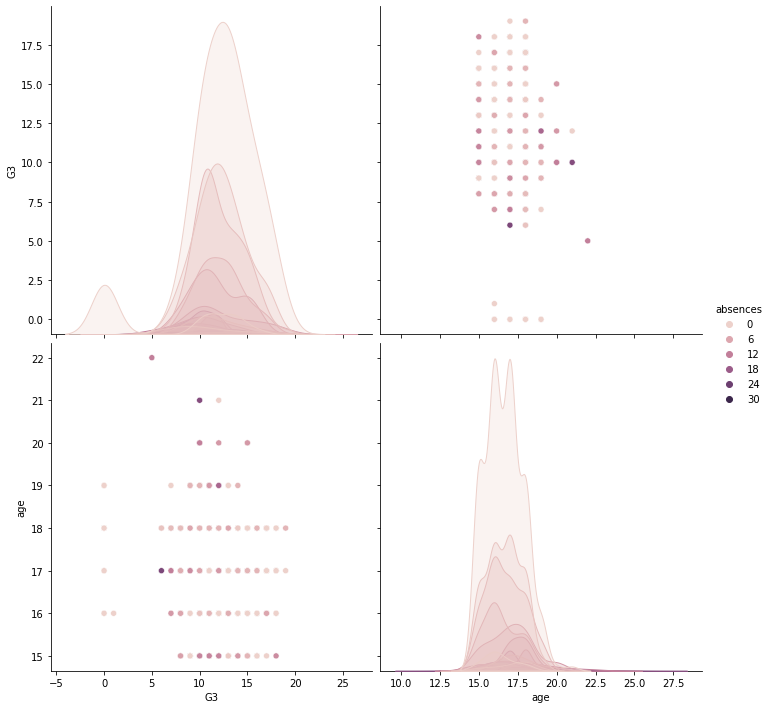

In [23]:
sb.pairplot(portuguese_df[['G3', 'absences','age']],hue='absences',height=5)

> Does sex and age have a combind effect on grade?

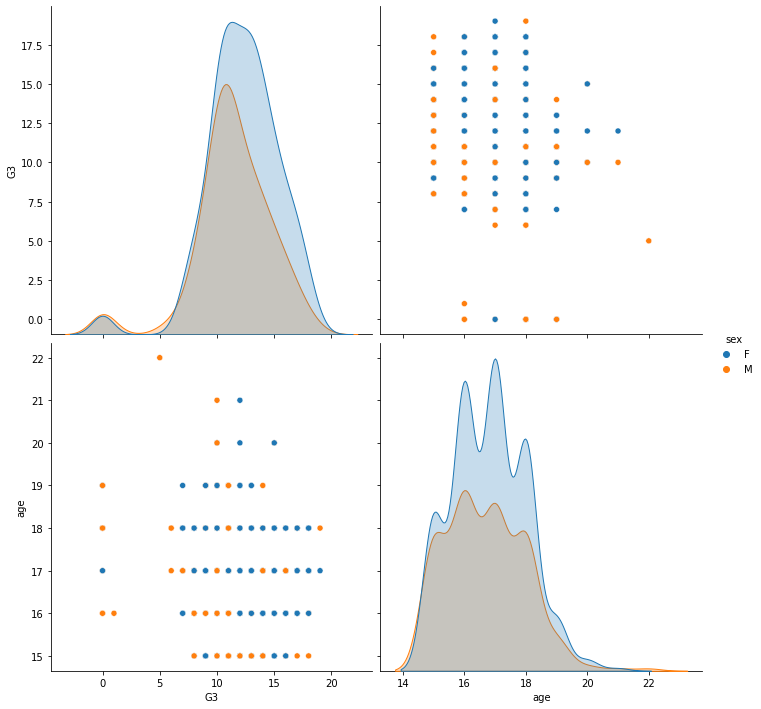

In [24]:
sb.pairplot(portuguese_df[['G3', 'age','sex']],hue='sex',height=5)

> From the graph above it women perform better than males. Is it because females study more??

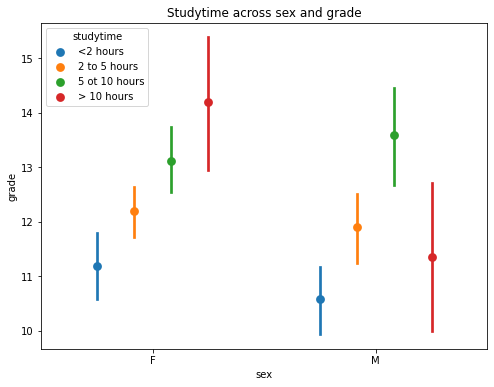

In [25]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = portuguese_df, x = 'sex', y = 'G3', hue = 'studytime',
            linestyles = '', dodge = 0.5)
plt.title('Studytime across sex and grade')
plt.ylabel('grade')
ax.set_yticklabels([],minor = True)
plt.show();

> This shows that women perform better with higher number of stuy time however men with study time greater than 10 hours seem to perfrom less

## Conclusions
> After this anlysis, it is I found out that most of the students Grades are highly influenced by thier study time. For females the more the study time the more the grades however for males it is the same until 10 hours after which thier grades drop. A second strong effect on the grade of students is the number of absences. More absences results to less perfromance. Although not has strong as the grades. 
Other things like family relations, drinking and outing didn't really have much effect on the grade of students. 

> In order to complete this task, I moved from one comparison of variables with the grades to another. To see how grades are affected by those activities. Depending on the variable type, I choose my plot and when a plot is not clear enough I either adjust it, or delete it and plot differently. For the ones that make some meaning and can give a small insight, I note them.

